# Dealing with Outliers

Sometimes outliers can mess up an analysis; you usually don't want a handful of data points to skew the overall results. Let's revisit our example of income data, with some random billionaire thrown in:

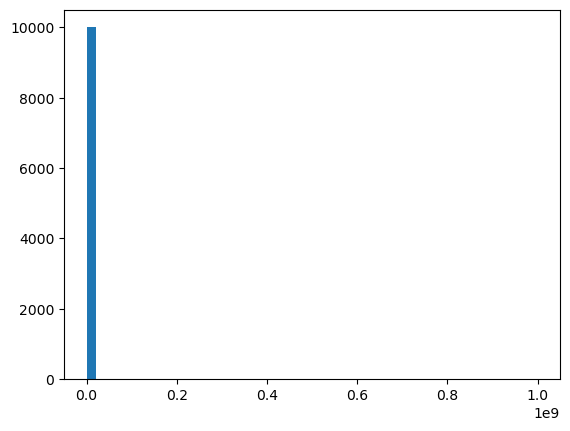

In [13]:
%matplotlib inline
import numpy as np

incomes = np.random.normal(27000, 15000, 10000)
incomes = np.append(incomes, [1000000000])

import matplotlib.pyplot as plt
plt.hist(incomes, 50)
plt.show()

That's not very helpful to look at. One billionaire ended up squeezing everybody else into a single line in my histogram. Plus it skewed my mean income significantly:

In [14]:
incomes.mean()

126965.6706236149

It's important to dig into what is causing your outliers, and understand where they are coming from. You also need to think about whether removing them is a valid thing to do, given the spirit of what it is you're trying to analyze. If I know I want to understand more about the incomes of "typical Americans", filtering out billionaires seems like a legitimate thing to do.

Here's something a little more robust than filtering out billionaires - it filters out anything beyond two standard deviations of the median value in the data set:

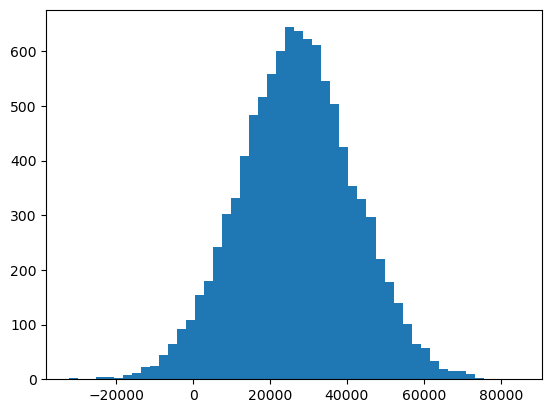

In [15]:
def reject_outliers(data):
    u = np.median(data)
    s = np.std(data)
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]
    return filtered

filtered = reject_outliers(incomes)

plt.hist(filtered,50)
plt.show()

That looks better. And, our mean is more, well, meangingful now as well:

In [16]:
np.mean(filtered)

26978.36719067725

## Activity

Instead of a single outlier, add several randomly-generated outliers to the data. Experiment with different values of the multiple of the standard deviation to identify outliers, and see what effect it has on the final results.

In [17]:
#Now let's add some more outliers to the data
incomes = np.random.normal(27000, 15000, 10000)
incomes = np.append(incomes, [1000000000])
incomes = np.append(incomes, [50000000])
incomes = np.append(incomes, [10])

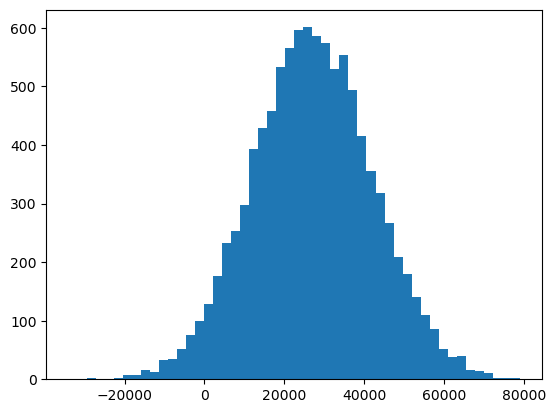

In [18]:
#Then let's filter out the outliers and visualize the resulting histogram
def reject_outliers(data):
    u = np.median(data)
    s = np.std(data)
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]
    return filtered

filtered = reject_outliers(incomes)

plt.hist(filtered,50)
plt.show()

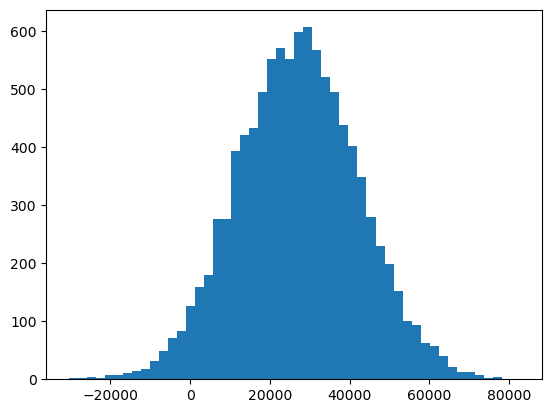

In [19]:
#We can see that we are still able to filter out the outliers pretty well
#Let's reset the data back to normal and change the magnitude of standard deviation used to find outliers
incomes = np.random.normal(27000, 15000, 10000)
incomes = np.append(incomes, [1000000000])



def reject_outliers(data):
    u = np.median(data)
    s = np.std(data)
    filtered = [e for e in data if (u - 3 * s < e < u + 3 * s)]
    return filtered

filtered = reject_outliers(incomes)

plt.hist(filtered,50)
plt.show()

In [20]:
#We can see that we now have more data towards the lower and upper ends of the histogram